In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [3]:
train=pd.read_csv('/content/train1.csv')
test=pd.read_csv('/content/test1.csv')

In [4]:
label_encoder = LabelEncoder().fit(train.species)
labels = label_encoder.transform(train.species)
classes = list(label_encoder.classes_)

In [5]:
#verilerin hazırlanması, özellik ve sınıf sayısının belirlenmesi
train.drop(["id", "species"], axis=1)
test = test.drop(["id"], axis=1)
nb_features = 192
nb_classes = len(classes)

In [6]:
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = label_encoder.fit_transform(train[column])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(train.values)
train=scaler.transform(train.values)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(train,labels,test_size=0.1)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)

In [10]:
# Reduce X_train and X_valid to 192 features by dropping the last 2 columns
X_train = np.array(X_train)[:, :192]
X_valid = np.array(X_valid)[:, :192]

# Reshape to (n_samples, 192, 1)
X_train = X_train.reshape(891, 192, 1)
X_valid = X_valid.reshape(99, 192, 1)

print("Reshaped X_train shape:", X_train.shape)
print("Reshaped X_valid shape:", X_valid.shape)


Reshaped X_train shape: (891, 192, 1)
Reshaped X_valid shape: (99, 192, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, Input

# Define the model
model = Sequential()
model.add(Input(shape=(nb_features, 1)))  # Using Input layer as recommended
model.add(Conv1D(512, 1))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 1))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(nb_classes, activation="softmax"))

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 192, 512)            │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 192, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 96, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 96, 256)             │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 96, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │      25,167,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 99)                  │         101,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,499,875 (104.90 MB)

 Trainable params: 27,499,875 (104.90 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Ağın derlenmesi
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Modelin eğitilmesi
model.fit(X_train, y_train, epochs=15, validation_data=(X_valid,y_valid))

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 922ms/step - accuracy: 0.0969 - loss: 4.2826 - val_accuracy: 0.5253 - val_loss: 1.8149
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 33s 672ms/step - accuracy: 0.7142 - loss: 1.2120 - val_accuracy: 0.7475 - val_loss: 0.8352
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 748ms/step - accuracy: 0.8727 - loss: 0.4789 - val_accuracy: 0.8081 - val_loss: 0.7628
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9314 - loss: 0.2899 - val_accuracy: 0.8990 - val_loss: 0.4881
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 731ms/step - accuracy: 0.9391 - loss: 0.2172 - val_accuracy: 0.9293 - val_loss: 0.3364
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 683ms/step - accuracy: 0.9836 - loss: 0.0633 - val_accuracy: 0.9192 - val_loss: 0.6629
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 922ms/step - accuracy: 0.9734 - loss: 0.0986 - val_accuracy: 0.9192 - val_loss: 0.2417
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9862 - loss: 0.1005 - val_accuracy: 

In [13]:
#Ortalama değerlerin gösterilmesi
print(("Ortalama Eğitim Kaybı: ", np.mean(model.history.history["loss"])))
print(("Ortalama Eğitim Basarım: ", np.mean(model.history.history["accuracy"])))
print(("Ortalama Doğrulama Kaybı: ", np.mean(model.history.history["val_loss"])))
print(("Ortalama Doğrulama Başarım: ", np.mean(model.history.history["val_accuracy"])))

('Ortalama Eğitim Kaybı: ', 0.4034060395594376)
('Ortalama Eğitim Basarım: ', 0.9079685737689336)
('Ortalama Doğrulama Kaybı: ', 0.5279630899429322)
('Ortalama Doğrulama Başarım: ', 0.8794612805048625)


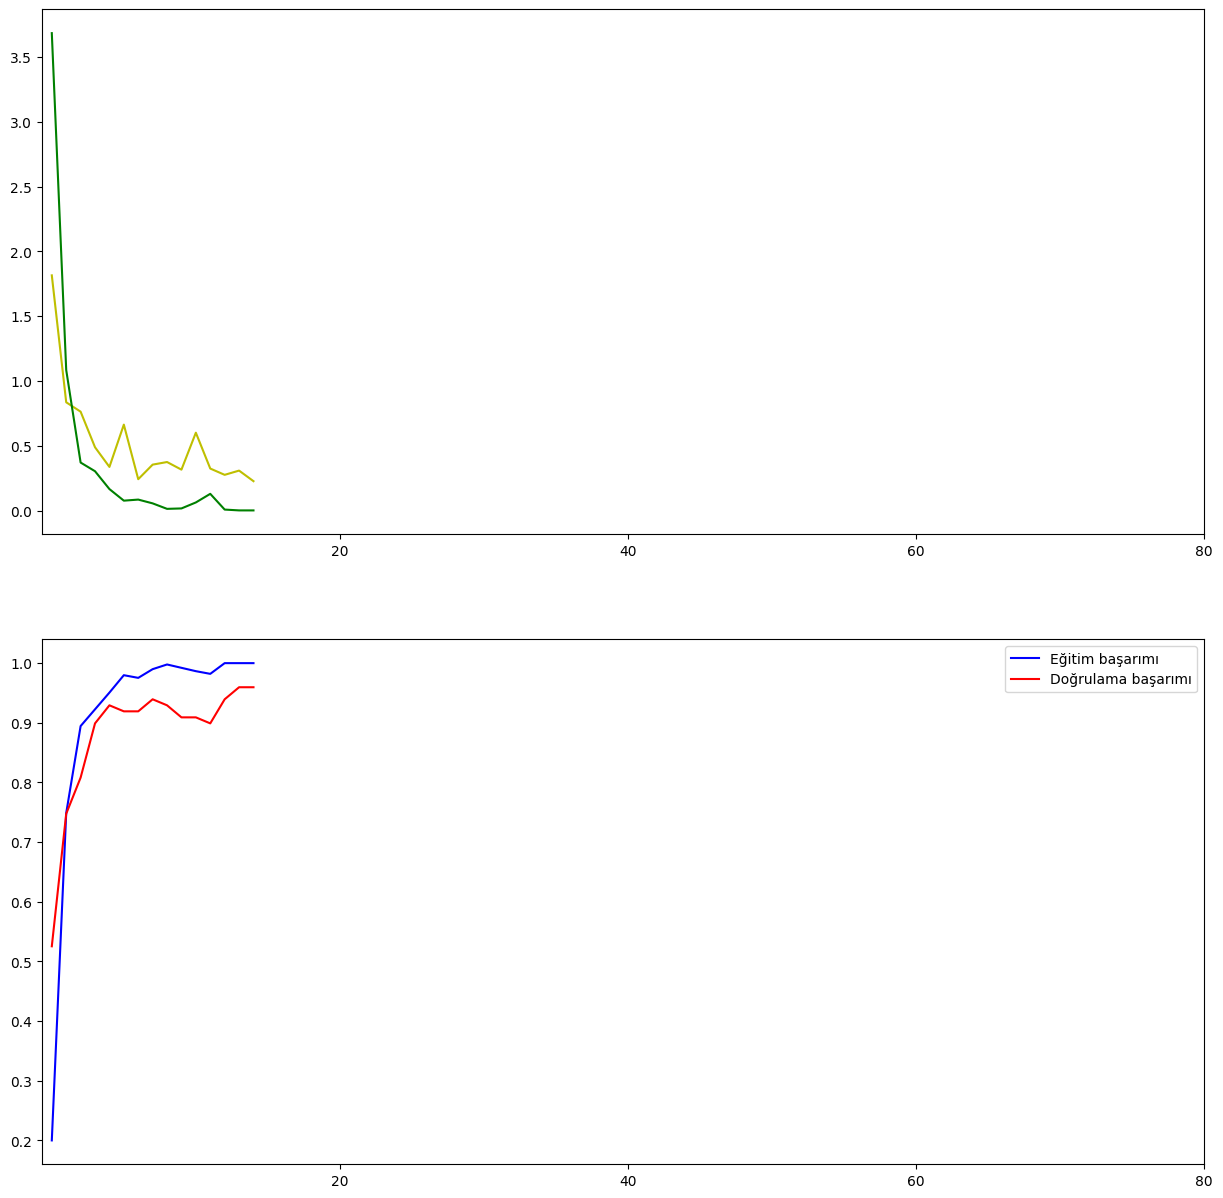

In [14]:
#Değerlerin grafik üzerinde gösterilmesi
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots (2, 1, figsize=(15, 15))
ax1.plot(model.history.history['val_loss'], color='y', label="Doğrulama kaybı")
ax1.plot(model.history.history['loss'], color='g', label="Eğitim kaybı" )
ax1.set_xticks (np.arange(20, 100, 20))
ax2.plot(model.history.history['accuracy'], color='b', label="Eğitim başarımı")
ax2.plot(model.history.history['val_accuracy'], color='r', label="Doğrulama başarımı")
ax2.set_xticks (np.arange(20, 100, 20))
plt.legend()
plt.show()

**Task1**

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, Input
from tensorflow.keras.utils import to_categorical

In [16]:
train = pd.read_csv('/content/train1.csv')
test = pd.read_csv('/content/test1.csv')

In [17]:
label_encoder = LabelEncoder().fit(train['species'])
labels = label_encoder.transform(train['species'])
classes = list(label_encoder.classes_)

In [18]:
train.drop(["id", "species"], axis=1, inplace=True)
test.drop(["id"], axis=1, inplace=True)
nb_features = 192
nb_classes = len(classes)

In [19]:
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = label_encoder.fit_transform(train[column])

In [20]:
scaler = StandardScaler().fit(train)
train = scaler.transform(train)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.1, random_state=42)
y_train = to_categorical(y_train, nb_classes)
y_valid = to_categorical(y_valid, nb_classes)

In [22]:
X_train = X_train.reshape(X_train.shape[0], nb_features, 1)
X_valid = X_valid.reshape(X_valid.shape[0], nb_features, 1)

In [23]:
model = Sequential([
    Input(shape=(nb_features, 1)),
    Conv1D(512, kernel_size=1, activation="relu"),
    MaxPooling1D(2),
    Conv1D(256, kernel_size=1, activation="relu"),
    MaxPooling1D(2),
    Dropout(0.25),
    Flatten(),
    Dense(2048, activation="relu"),
    Dense(1024, activation="relu"),
    Dense(nb_classes, activation="softmax")
])

In [24]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [25]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


**Task2**

In [26]:
from sklearn.model_selection import KFold

In [27]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []

In [28]:
for train_idx, val_idx in kfold.split(X_train, y_train):
    model = Sequential([
        Input(shape=(nb_features, 1)),
        Conv1D(512, kernel_size=1, activation="relu"),
        MaxPooling1D(2),
        Conv1D(256, kernel_size=1, activation="relu"),
        MaxPooling1D(2),
        Dropout(0.25),
        Flatten(),
        Dense(2048, activation="relu"),
        Dense(1024, activation="relu"),
        Dense(nb_classes, activation="softmax")
    ])

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train[train_idx], y_train[train_idx], epochs=15, validation_data=(X_train[val_idx], y_train[val_idx]), verbose=0)
scores = model.evaluate(X_train[val_idx], y_train[val_idx], verbose=0)
cvscores.append(scores[1] * 100)

In [32]:
print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Cross-Validation Accuracy: 86.52% (+/- 0.00%)


**Task3**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
y_pred = model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_valid, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [41]:
unique_classes = np.unique(np.concatenate((y_true, y_pred_classes)))
target_names = [f"class_{i}" for i in unique_classes]
report = classification_report(y_true, y_pred_classes, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00         0
     class_3       0.00      0.00      0.00         0
     class_5       1.00      1.00      1.00         3
     class_9       1.00      1.00      1.00         2
    class_10       1.00      1.00      1.00         1
    class_11       1.00      1.00      1.00         1
    class_13       1.00      1.00      1.00         1
    class_15       1.00      1.00      1.00         1
    class_17       1.00      1.00      1.00         2
    class_19       1.00      0.50      0.67         2
    class_20       1.00      1.00      1.00         3
    class_21       1.00      1.00      1.00         1
    class_22       1.00      1.00      1.00         1
    class_25       1.00      1.00      1.00         1
    class_26       1.00      1.00      1.00         2
    class_27       1.00      1.00      1.00         1
    class_30       1.00      1.00      1.00         1
    class_32       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [42]:
cm = confusion_matrix(y_true, y_pred_classes)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity:", specificity)

Specificity: nan


<ipython-input-42-259883884f8e>:2: RuntimeWarning: invalid value encountered in scalar divide
  specificity = cm[1,1] / (cm[1,0] + cm[1,1])


**Task4**

In [69]:
from sklearn.datasets import load_diabetes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Dense, GlobalMaxPooling1D

In [70]:
diabetes_data = load_diabetes()
X = diabetes_data.data

In [88]:
model = Sequential([
    Input(shape=(nb_features, 1)),
    Conv1D(512, kernel_size=1, activation="relu"),
    MaxPooling1D(2),
    Conv1D(256, kernel_size=1, activation="relu"),
    MaxPooling1D(2),
    Dropout(0.25),
    GlobalMaxPooling1D(),
    Dense(2048, activation="relu"),
    Dense(1024, activation="relu"),
    Dense(nb_classes, activation="softmax")
])


In [89]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.add(Dropout(0.5))


In [90]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)


In [91]:
print("Reshaped X_train shape:", X_train.shape)
print("Reshaped X_valid shape:", X_valid.shape)


Reshaped X_train shape: (891, 192, 1)
Reshaped X_valid shape: (99, 192, 1)


In [95]:
from tensorflow.keras.regularizers import l2
Dense(64, activation="relu", kernel_regularizer=l2(0.01))

<Dense name=dense_31, built=False>

In [96]:
from tensorflow.keras.layers import BatchNormalization
model.add(BatchNormalization())


In [103]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stopping])


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.0682 - loss: 0.1062 - val_accuracy: 0.0404 - val_loss: 0.3470
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.0878 - loss: 0.1055 - val_accuracy: 0.0707 - val_loss: 0.3766
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.1081 - loss: 0.1046 - val_accuracy: 0.0606 - val_loss: 0.3576
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.1025 - loss: 0.1065 - val_accuracy: 0.1313 - val_loss: 0.3769
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.1050 - loss: 0.1090 - val_accuracy: 0.0707 - val_loss: 0.3487
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.1300 - loss: 0.1041 - val_accuracy: 0.0606 - val_loss: 0.3397
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.0847 - loss: 0.1052 - val_accuracy: 0.0606 - val_loss: 0.3505
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.0909 - loss: 0.1051 - val_accuracy: 0.

In [105]:
import matplotlib.pyplot as plt


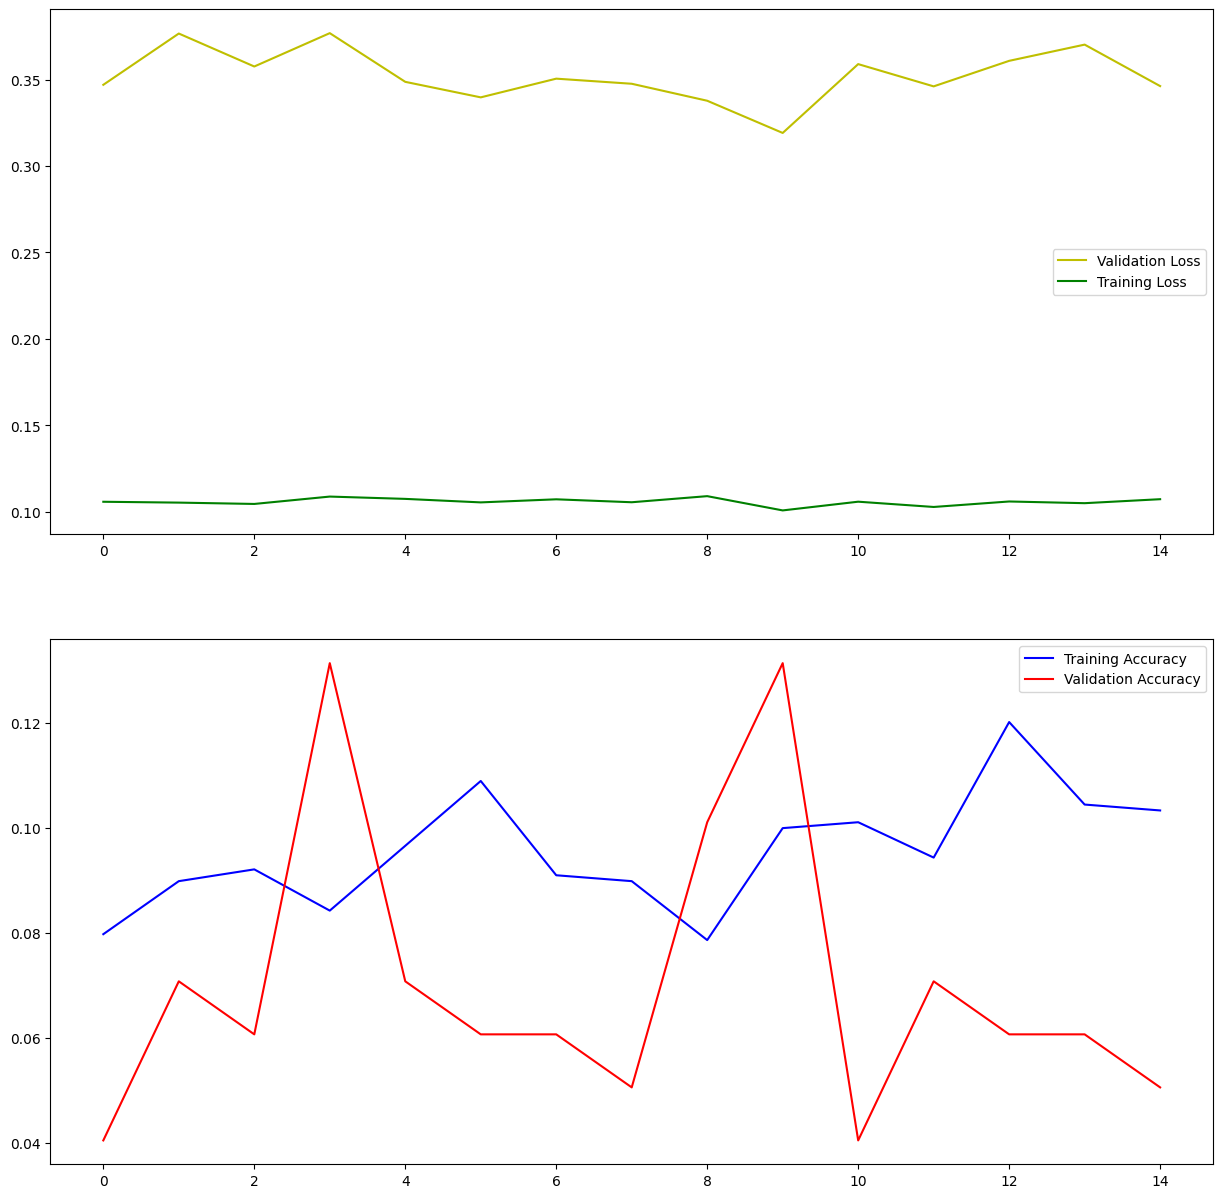

In [106]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
ax1.plot(history.history['val_loss'], color='y', label="Validation Loss")
ax1.plot(history.history['loss'], color='g', label="Training Loss")
ax1.legend()


ax2.plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax2.plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
ax2.legend()
plt.show()

**Task 5**

In [78]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

optimizers = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop()
}

In [79]:

results = {}
for name, opt in optimizers.items():
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), verbose=0)
    final_val_accuracy = history.history['val_accuracy'][-1]
    results[name] = final_val_accuracy
    print(f"{name} Final Validation Accuracy: {final_val_accuracy:.4f}")

Adam Final Validation Accuracy: 0.1818
SGD Final Validation Accuracy: 0.1818
RMSprop Final Validation Accuracy: 0.1515


In [80]:

best_optimizer = max(results, key=results.get)
print(f"Best Optimizer: {best_optimizer} with accuracy {results[best_optimizer]:.4f}")

Best Optimizer: Adam with accuracy 0.1818
